In [1]:
import pandas as pd
from tqdm.notebook import tqdm
from os.path import exists
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from data.get_uci import all_datasets
from analysis.util import fetch, init_uci_dict, get_uci_info

In [2]:
filters = {
    "group": "benchmark8"
}
raw = fetch("soft-gp-2", filters)

100%|██████████| 36/36 [00:17<00:00,  2.09it/s]


In [3]:
filters = {
    "group": "benchmark6",
}
raw2 = fetch("soft-gp-2", filters)

100%|██████████| 216/216 [01:25<00:00,  2.53it/s]


In [4]:
uci_info = get_uci_info()

In [5]:
uci_dict = {}
for exp in raw:
    model = exp.config["model.name"]
    dataset = exp.config["dataset.name"]
    num_inducing = exp.config["model.num_inducing"]
    dtype = exp.config["model.dtype"]
    seed = exp.config["training.seed"]
    train_frac = float(exp.config["dataset.train_frac"])
    if (dataset, seed, num_inducing, train_frac, model) in uci_dict:
        print("FAIL", (dataset, seed, num_inducing, train_frac, model))
    uci_dict[(dataset, seed, num_inducing, train_frac, model)] = exp.history

for exp in raw2:
    model = exp.config["model.name"]
    if model == "sv-gp" or model == "svi-gp":
        dataset = exp.config["dataset.name"]
        num_inducing = exp.config["model.num_inducing"]
        dtype = exp.config["model.dtype"]
        seed = exp.config["training.seed"]
        train_frac = float(exp.config["dataset.train_frac"])
        if (dataset, seed, num_inducing, train_frac, model) in uci_dict:
            print("FAIL", (dataset, seed, num_inducing, train_frac, model))
        uci_dict[(dataset, seed, num_inducing, train_frac, model)] = exp.history

# for key in uci_dict.keys():
#     print(key)

In [6]:
seeds = [6535, 8830, 92357]
num_inducings = [512, 1024]
KZZ = {}
all_bins = {}
fracs = [0.9]
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
models = ["soft-gp", "svi-gp", "sv-gp"]

# models = ["sv-gp"]
for seed in seeds:
    for model in models:
        for num_inducing in num_inducings:
            for frac in fracs:
                xs = []
                ts = []
                for dataset, _, _, _ in uci_info:
                    try:
                        xs += [uci_dict[(dataset, seed, num_inducing, frac, model)]["test_rmse"][49]]
                        ts += [np.array(uci_dict[(dataset, seed, num_inducing, frac, model)]["epoch_time"][49]).mean()]
                    except Exception as e:
                        xs += [np.nan]
                        ts += [np.nan]
                        print("Exception", e, model, dataset)

                tmp[f"{model}-{num_inducing}-{frac}-{seed}"] = xs
                tmp[f"time-{model}-{num_inducing}-{frac}-{seed}"] = ts

df = pd.DataFrame(data=tmp)
df.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
df

Exception ('pol', 6535, 1024, 0.9, 'soft-gp') soft-gp pol
Exception ('elevators', 6535, 1024, 0.9, 'soft-gp') soft-gp elevators
Exception ('bike', 6535, 1024, 0.9, 'soft-gp') soft-gp bike
Exception ('kin40k', 6535, 1024, 0.9, 'soft-gp') soft-gp kin40k
Exception ('protein', 6535, 1024, 0.9, 'soft-gp') soft-gp protein
Exception ('keggdirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggdirected
Exception ('slice', 6535, 1024, 0.9, 'soft-gp') soft-gp slice
Exception ('keggundirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggundirected
Exception ('3droad', 6535, 1024, 0.9, 'soft-gp') soft-gp 3droad
Exception ('song', 6535, 1024, 0.9, 'soft-gp') soft-gp song
Exception ('buzz', 6535, 1024, 0.9, 'soft-gp') soft-gp buzz
Exception ('houseelectric', 6535, 1024, 0.9, 'soft-gp') soft-gp houseelectric
Exception 'test_rmse' sv-gp 3droad
Exception 'test_rmse' sv-gp song
Exception 'test_rmse' sv-gp buzz
Exception 'test_rmse' sv-gp houseelectric
Exception 'test_rmse' sv-gp 3droad
Exception 'test_rmse' sv

,N,D,soft-gp-512-0.9-6535,time-soft-gp-512-0.9-6535,soft-gp-1024-0.9-6535,time-soft-gp-1024-0.9-6535,svi-gp-512-0.9-6535,time-svi-gp-512-0.9-6535,svi-gp-1024-0.9-6535,time-svi-gp-1024-0.9-6535,...,soft-gp-1024-0.9-92357,time-soft-gp-1024-0.9-92357,svi-gp-512-0.9-92357,time-svi-gp-512-0.9-92357,svi-gp-1024-0.9-92357,time-svi-gp-1024-0.9-92357,sv-gp-512-0.9-92357,time-sv-gp-512-0.9-92357,sv-gp-1024-0.9-92357,time-sv-gp-1024-0.9-92357
Pol,13500,26,0.165535,0.957758,NaN,NaN,0.311350,1.296715,0.293881,1.628926,...,NaN,NaN,0.321628,1.327214,0.302314,1.454040,0.265855,0.009525,0.252210,0.018156
Elevators,14939,18,0.398479,1.152537,NaN,NaN,0.389946,1.262276,0.388310,1.454629,...,NaN,NaN,0.381559,1.255358,0.380791,1.456043,0.394617,0.010938,0.390336,0.018376
Bike,15641,17,0.205229,1.088694,NaN,NaN,0.284535,1.332126,0.271703,1.499948,...,NaN,NaN,0.279236,1.347529,0.266835,1.513914,0.282263,0.010315,0.269703,0.015463
Kin40k,36000,8,0.195797,2.480578,NaN,NaN,0.235442,3.139618,0.197408,3.607123,...,NaN,NaN,0.229365,3.155264,0.192120,3.458676,0.201698,0.011665,0.171754,0.019259
Protein,41157,9,0.640949,2.702377,NaN,NaN,0.692984,3.017151,0.666799,4.149859,...,NaN,NaN,0.687830,3.413769,0.661023,4.098860,0.663547,0.012055,0.630435,0.019942
Keggdirected,43944,20,0.080777,2.808367,NaN,NaN,0.086325,3.651873,0.085391,4.511645,...,NaN,NaN,0.094027,3.784911,0.093862,4.304150,0.118892,0.010079,0.147462,0.020524
Slice,48150,385,0.040312,3.136925,NaN,NaN,0.139487,4.332010,0.128201,4.924727,...,NaN,NaN,0.137776,4.466411,0.125384,5.045128,0.454715,0.014877,0.408396,0.024747
Keggundirected,57247,27,0.115206,3.636164,NaN,NaN,0.130467,5.449997,0.130300,5.522882,...,NaN,NaN,0.131526,4.827819,0.131146,5.629603,0.136855,0.013922,0.128690,0.021803
3droad,391386,3,0.572497,24.096513,NaN,NaN,0.531515,33.051935,0.496384,37.943065,...,NaN,NaN,0.528140,33.926530,0.495213,37.835541,NaN,NaN,NaN,NaN
Song,270000,90,0.802532,17.633134,NaN,NaN,0.810079,23.424486,0.808013,26.780641,...,NaN,NaN,0.801442,23.427389,0.799972,26.567973,NaN,NaN,NaN,NaN


# Plot RMSE

In [8]:
def pm_var(df, model):
    print(df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].mean(axis=1))
    m = df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].mean(axis=1).round(3).astype(str)
    v = df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].std(axis=1).round(3).astype(str).apply(lambda x: f" $\pm$ {x}")
    return (m + v).apply(lambda x: x.replace("nan $\pm$ nan", "-"))
df_rmse = pd.DataFrame()
df_rmse[['N', 'D']] = df[['N', 'D']]
for model in ["soft-gp-512", "sv-gp-512", "svi-gp-1024"]:
    for frac in [0.9]:
        df_rmse[f'{model}-{frac}'] = pm_var(df, f'{model}-{frac}')
        # df_rmse['svi-gp'] = pm_var(df, "svi-gp")
        # df_rmse['soft-gp'] = pm_var(df, "soft-gp")

df_rmse

Pol               0.176430
Elevators         0.396540
Bike              0.208337
Kin40k            0.196110
Protein           0.626829
Keggdirected      0.081706
Slice             0.035760
Keggundirected    0.115070
3droad            0.574382
Song              0.798113
Buzz              0.251085
Houseelectric     0.054674
dtype: float64
Pol               0.260169
Elevators         0.401283
Bike              0.283593
Kin40k            0.205495
Protein           0.660067
Keggdirected      0.102301
Slice             0.478971
Keggundirected    0.125610
3droad                 NaN
Song                   NaN
Buzz                   NaN
Houseelectric          NaN
dtype: float64
Pol               0.299728
Elevators         0.389187
Bike              0.268107
Kin40k            0.191613
Protein           0.659543
Keggdirected      0.087872
Slice             0.126607
Keggundirected    0.126600
3droad            0.496131
Song              0.803247
Buzz              0.295884
Houseelectric     0.07063

,N,D,soft-gp-512-0.9,sv-gp-512-0.9,svi-gp-1024-0.9
Pol,13500,26,0.176 $\pm$ 0.01,0.26 $\pm$ 0.007,0.3 $\pm$ 0.005
Elevators,14939,18,0.397 $\pm$ 0.012,0.401 $\pm$ 0.007,0.389 $\pm$ 0.009
Bike,15641,17,0.208 $\pm$ 0.004,0.284 $\pm$ 0.001,0.268 $\pm$ 0.003
Kin40k,36000,8,0.196 $\pm$ 0.005,0.205 $\pm$ 0.008,0.192 $\pm$ 0.006
Protein,41157,9,0.627 $\pm$ 0.013,0.66 $\pm$ 0.01,0.66 $\pm$ 0.008
Keggdirected,43944,20,0.082 $\pm$ 0.006,0.102 $\pm$ 0.016,0.088 $\pm$ 0.005
Slice,48150,385,0.036 $\pm$ 0.005,0.479 $\pm$ 0.027,0.127 $\pm$ 0.001
Keggundirected,57247,27,0.115 $\pm$ 0.004,0.126 $\pm$ 0.011,0.127 $\pm$ 0.007
3droad,391386,3,0.574 $\pm$ 0.002,-,0.496 $\pm$ 0.001
Song,270000,90,0.798 $\pm$ 0.004,-,0.803 $\pm$ 0.004


In [9]:
df2 = df_rmse[["N", "D", "soft-gp-512-0.9", "sv-gp-512-0.9", "svi-gp-1024-0.9"]]
df2 = df2.sort_values(by=['D'], ascending=[True])
df2

,N,D,soft-gp-512-0.9,sv-gp-512-0.9,svi-gp-1024-0.9
3droad,391386,3,0.574 $\pm$ 0.002,-,0.496 $\pm$ 0.001
Kin40k,36000,8,0.196 $\pm$ 0.005,0.205 $\pm$ 0.008,0.192 $\pm$ 0.006
Protein,41157,9,0.627 $\pm$ 0.013,0.66 $\pm$ 0.01,0.66 $\pm$ 0.008
Houseelectric,1844352,11,0.055 $\pm$ 0.0,-,0.071 $\pm$ 0.0
Bike,15641,17,0.208 $\pm$ 0.004,0.284 $\pm$ 0.001,0.268 $\pm$ 0.003
Elevators,14939,18,0.397 $\pm$ 0.012,0.401 $\pm$ 0.007,0.389 $\pm$ 0.009
Keggdirected,43944,20,0.082 $\pm$ 0.006,0.102 $\pm$ 0.016,0.088 $\pm$ 0.005
Pol,13500,26,0.176 $\pm$ 0.01,0.26 $\pm$ 0.007,0.3 $\pm$ 0.005
Keggundirected,57247,27,0.115 $\pm$ 0.004,0.126 $\pm$ 0.011,0.127 $\pm$ 0.007
Buzz,524925,77,0.251 $\pm$ 0.001,-,0.296 $\pm$ 0.001


In [10]:
latex_table = df2.to_latex(
    index=True,
    escape=False,
    float_format="{:0.3f}".format,
)
print(latex_table)

\begin{tabular}{lrrlll}
\toprule
 & N & D & soft-gp-512-0.9 & sv-gp-512-0.9 & svi-gp-1024-0.9 \\
\midrule
3droad & 391386 & 3 & 0.574 $\pm$ 0.002 & - & 0.496 $\pm$ 0.001 \\
Kin40k & 36000 & 8 & 0.196 $\pm$ 0.005 & 0.205 $\pm$ 0.008 & 0.192 $\pm$ 0.006 \\
Protein & 41157 & 9 & 0.627 $\pm$ 0.013 & 0.66 $\pm$ 0.01 & 0.66 $\pm$ 0.008 \\
Houseelectric & 1844352 & 11 & 0.055 $\pm$ 0.0 & - & 0.071 $\pm$ 0.0 \\
Bike & 15641 & 17 & 0.208 $\pm$ 0.004 & 0.284 $\pm$ 0.001 & 0.268 $\pm$ 0.003 \\
Elevators & 14939 & 18 & 0.397 $\pm$ 0.012 & 0.401 $\pm$ 0.007 & 0.389 $\pm$ 0.009 \\
Keggdirected & 43944 & 20 & 0.082 $\pm$ 0.006 & 0.102 $\pm$ 0.016 & 0.088 $\pm$ 0.005 \\
Pol & 13500 & 26 & 0.176 $\pm$ 0.01 & 0.26 $\pm$ 0.007 & 0.3 $\pm$ 0.005 \\
Keggundirected & 57247 & 27 & 0.115 $\pm$ 0.004 & 0.126 $\pm$ 0.011 & 0.127 $\pm$ 0.007 \\
Buzz & 524925 & 77 & 0.251 $\pm$ 0.001 & - & 0.296 $\pm$ 0.001 \\
Song & 270000 & 90 & 0.798 $\pm$ 0.004 & - & 0.803 $\pm$ 0.004 \\
Slice & 48150 & 385 & 0.036 $\pm$ 0.00

# Plot Time

In [11]:
def pm_var_time(df, model):
    m = df[[f'time-{model}-6535', f'time-{model}-8830', f'time-{model}-92357']].mean(axis=1).round(3).astype(str)
    v = df[[f'time-{model}-6535', f'time-{model}-8830', f'time-{model}-92357']].std(axis=1).round(3).astype(str).apply(lambda x: f" $\pm$ {x}")
    return (m + v).apply(lambda x: x.replace("nan $\pm$ nan", "-"))

tmp = {
    "N": [int(np.floor(N * .9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
    "exact-rep": [e for _, _, _, e in uci_info],
}
df_time = pd.DataFrame()
df_time.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
for model in models:
    for num_inducing in num_inducings:
        for frac in fracs:
            col = pm_var_time(df, f'{model}-{num_inducing}-{frac}')
            df_time[f'{model}-{num_inducing}-{frac}'] = col
df_time

,soft-gp-512-0.9,soft-gp-1024-0.9,svi-gp-512-0.9,svi-gp-1024-0.9,sv-gp-512-0.9,sv-gp-1024-0.9
Pol,0.949 $\pm$ 0.011,-,1.305 $\pm$ 0.019,1.476 $\pm$ 0.144,0.009 $\pm$ 0.001,0.017 $\pm$ 0.002
Elevators,1.07 $\pm$ 0.073,-,1.268 $\pm$ 0.017,1.452 $\pm$ 0.006,0.013 $\pm$ 0.001,0.017 $\pm$ 0.003
Bike,1.087 $\pm$ 0.004,-,1.278 $\pm$ 0.107,1.511 $\pm$ 0.01,0.011 $\pm$ 0.001,0.015 $\pm$ 0.0
Kin40k,2.495 $\pm$ 0.021,-,3.139 $\pm$ 0.016,3.545 $\pm$ 0.077,0.012 $\pm$ 0.002,0.019 $\pm$ 0.0
Protein,2.713 $\pm$ 0.01,-,3.301 $\pm$ 0.247,4.137 $\pm$ 0.034,0.012 $\pm$ 0.001,0.022 $\pm$ 0.002
Keggdirected,2.801 $\pm$ 0.024,-,3.713 $\pm$ 0.067,4.344 $\pm$ 0.152,0.012 $\pm$ 0.003,0.021 $\pm$ 0.0
Slice,3.172 $\pm$ 0.044,-,4.425 $\pm$ 0.081,5.008 $\pm$ 0.073,0.015 $\pm$ 0.001,0.028 $\pm$ 0.004
Keggundirected,3.678 $\pm$ 0.047,-,5.04 $\pm$ 0.355,5.572 $\pm$ 0.054,0.014 $\pm$ 0.002,0.022 $\pm$ 0.001
3droad,24.272 $\pm$ 0.154,-,33.428 $\pm$ 0.45,37.903 $\pm$ 0.059,-,-
Song,17.451 $\pm$ 0.261,-,23.364 $\pm$ 0.107,26.694 $\pm$ 0.111,-,-


In [12]:
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
df_44 = pd.DataFrame(data=tmp)
df_44.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
df5 = pd.concat([df_44, df_time[["soft-gp-512-0.9", "svi-gp-512-0.9", "svi-gp-1024-0.9"]]], axis=1)
df5 = df5.sort_values(by=['D'], ascending=[True])
df5

,N,D,soft-gp-512-0.9,svi-gp-512-0.9,svi-gp-1024-0.9
3droad,391386,3,24.272 $\pm$ 0.154,33.428 $\pm$ 0.45,37.903 $\pm$ 0.059
Kin40k,36000,8,2.495 $\pm$ 0.021,3.139 $\pm$ 0.016,3.545 $\pm$ 0.077
Protein,41157,9,2.713 $\pm$ 0.01,3.301 $\pm$ 0.247,4.137 $\pm$ 0.034
Houseelectric,1844352,11,117.933 $\pm$ 1.963,155.967 $\pm$ 2.957,176.823 $\pm$ 6.568
Bike,15641,17,1.087 $\pm$ 0.004,1.278 $\pm$ 0.107,1.511 $\pm$ 0.01
Elevators,14939,18,1.07 $\pm$ 0.073,1.268 $\pm$ 0.017,1.452 $\pm$ 0.006
Keggdirected,43944,20,2.801 $\pm$ 0.024,3.713 $\pm$ 0.067,4.344 $\pm$ 0.152
Pol,13500,26,0.949 $\pm$ 0.011,1.305 $\pm$ 0.019,1.476 $\pm$ 0.144
Keggundirected,57247,27,3.678 $\pm$ 0.047,5.04 $\pm$ 0.355,5.572 $\pm$ 0.054
Buzz,524925,77,34.394 $\pm$ 0.381,49.494 $\pm$ 7.615,52.201 $\pm$ 0.558


In [13]:
latex_table = df5.to_latex(
    index=True,
    escape=False,
    float_format="{:0.3f}".format,
)
print(latex_table)

\begin{tabular}{lrrlll}
\toprule
 & N & D & soft-gp-512-0.9 & svi-gp-512-0.9 & svi-gp-1024-0.9 \\
\midrule
3droad & 391386 & 3 & 24.272 $\pm$ 0.154 & 33.428 $\pm$ 0.45 & 37.903 $\pm$ 0.059 \\
Kin40k & 36000 & 8 & 2.495 $\pm$ 0.021 & 3.139 $\pm$ 0.016 & 3.545 $\pm$ 0.077 \\
Protein & 41157 & 9 & 2.713 $\pm$ 0.01 & 3.301 $\pm$ 0.247 & 4.137 $\pm$ 0.034 \\
Houseelectric & 1844352 & 11 & 117.933 $\pm$ 1.963 & 155.967 $\pm$ 2.957 & 176.823 $\pm$ 6.568 \\
Bike & 15641 & 17 & 1.087 $\pm$ 0.004 & 1.278 $\pm$ 0.107 & 1.511 $\pm$ 0.01 \\
Elevators & 14939 & 18 & 1.07 $\pm$ 0.073 & 1.268 $\pm$ 0.017 & 1.452 $\pm$ 0.006 \\
Keggdirected & 43944 & 20 & 2.801 $\pm$ 0.024 & 3.713 $\pm$ 0.067 & 4.344 $\pm$ 0.152 \\
Pol & 13500 & 26 & 0.949 $\pm$ 0.011 & 1.305 $\pm$ 0.019 & 1.476 $\pm$ 0.144 \\
Keggundirected & 57247 & 27 & 3.678 $\pm$ 0.047 & 5.04 $\pm$ 0.355 & 5.572 $\pm$ 0.054 \\
Buzz & 524925 & 77 & 34.394 $\pm$ 0.381 & 49.494 $\pm$ 7.615 & 52.201 $\pm$ 0.558 \\
Song & 270000 & 90 & 17.451 $\pm$ 0.2

# Plot Bins

In [14]:
seeds = [6535, 8830, 92357]
num_inducings = [512, 1024]
KZZ = {}
all_bins = {}
frac = 0.9
# fracs = [0.44, 0.89]
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
models = ["soft-gp", "svi-gp", "sv-gp"]

# models = ["sv-gp"]
for seed in seeds:
    for model in models:
        for num_inducing in num_inducings:
            K_zzs = []
            bins1 = []
            bins2 = []
            bins3 = []
            bins4 = []
            bins5 = []
            bins6 = []
            for dataset, _, _, _ in uci_info:
                try:
                    # K_zzs += [uci_dict[(dataset, seed, num_inducing, model)]["K_zz"][i] for i in range(5)]
                    bins1 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.0"][49]]
                    bins2 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-20"][49]]
                    bins3 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-10"][49]]
                    bins4 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-05"][49]]
                    bins5 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.01"][49]]
                    bins6 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.5"][49]]
                except Exception as e:
                    bins1 += [np.nan]
                    bins2 += [np.nan]
                    bins3 += [np.nan]
                    bins4 += [np.nan]
                    bins5 += [np.nan]
                    bins6 += [np.nan]
                    print("Exception bins", e, model, dataset)

            all_bins[f"0.0-{model}-{num_inducing}-{seed}"] = bins1
            all_bins[f"1e-20-{model}-{num_inducing}-{seed}"] = bins2
            all_bins[f"1e-10-{model}-{num_inducing}-{seed}"] = bins3
            all_bins[f"1e-05-{model}-{num_inducing}-{seed}"] = bins4
            all_bins[f"0.01-{model}-{num_inducing}-{seed}"] = bins5
            all_bins[f"0.5-{model}-{num_inducing}-{seed}"] = bins6
            KZZ[f"kzz-{model}-{num_inducing}-{seed}"] = K_zzs


Exception bins ('pol', 6535, 1024, 0.9, 'soft-gp') soft-gp pol
Exception bins ('elevators', 6535, 1024, 0.9, 'soft-gp') soft-gp elevators
Exception bins ('bike', 6535, 1024, 0.9, 'soft-gp') soft-gp bike
Exception bins ('kin40k', 6535, 1024, 0.9, 'soft-gp') soft-gp kin40k
Exception bins ('protein', 6535, 1024, 0.9, 'soft-gp') soft-gp protein
Exception bins ('keggdirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggdirected
Exception bins ('slice', 6535, 1024, 0.9, 'soft-gp') soft-gp slice
Exception bins ('keggundirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggundirected
Exception bins ('3droad', 6535, 1024, 0.9, 'soft-gp') soft-gp 3droad
Exception bins ('song', 6535, 1024, 0.9, 'soft-gp') soft-gp song
Exception bins ('buzz', 6535, 1024, 0.9, 'soft-gp') soft-gp buzz
Exception bins ('houseelectric', 6535, 1024, 0.9, 'soft-gp') soft-gp houseelectric
Exception bins 'K_zz_bin_0.0' sv-gp 3droad
Exception bins 'K_zz_bin_0.0' sv-gp song
Exception bins 'K_zz_bin_0.0' sv-gp buzz
Exception bins 'K

In [15]:
df_bins = pd.DataFrame(data=all_bins)
df_bins.index = [name.replace("_", "-") for name, _, _, _ in uci_info]
df_bins

,0.0-soft-gp-512-6535,1e-20-soft-gp-512-6535,1e-10-soft-gp-512-6535,1e-05-soft-gp-512-6535,0.01-soft-gp-512-6535,0.5-soft-gp-512-6535,0.0-soft-gp-1024-6535,1e-20-soft-gp-1024-6535,1e-10-soft-gp-1024-6535,1e-05-soft-gp-1024-6535,...,1e-10-sv-gp-512-92357,1e-05-sv-gp-512-92357,0.01-sv-gp-512-92357,0.5-sv-gp-512-92357,0.0-sv-gp-1024-92357,1e-20-sv-gp-1024-92357,1e-10-sv-gp-1024-92357,1e-05-sv-gp-1024-92357,0.01-sv-gp-1024-92357,0.5-sv-gp-1024-92357
pol,96872,100434,47638,5900,1854,698,NaN,NaN,NaN,NaN,...,74132.0,86224.0,10926.0,0.0,27902.0,317878.0,316052.0,267596.0,26282.0,0.0
elevators,4136,6668,42078,28286,53632,3258,NaN,NaN,NaN,NaN,...,5588.0,73034.0,180454.0,0.0,5136.0,58.0,21470.0,305048.0,715702.0,0.0
bike,0,0,838,5642,97530,10488,NaN,NaN,NaN,NaN,...,0.0,66426.0,195718.0,0.0,0.0,0.0,0.0,199700.0,848876.0,0.0
kin40k,0,0,20430,30492,61022,8020,NaN,NaN,NaN,NaN,...,0.0,61520.0,200624.0,0.0,0.0,0.0,20.0,274596.0,773960.0,0.0
protein,203966,39158,13860,1572,400,1190,NaN,NaN,NaN,NaN,...,60072.0,76160.0,49648.0,0.0,43180.0,191720.0,246150.0,262466.0,106032.0,0.0
keggdirected,16778,16464,25054,14192,63758,16892,NaN,NaN,NaN,NaN,...,27120.0,89564.0,114992.0,0.0,23344.0,29800.0,101302.0,369588.0,491128.0,0.0
slice,261632,0,0,0,0,512,NaN,NaN,NaN,NaN,...,118124.0,130236.0,2622.0,0.0,2084.0,42572.0,497428.0,499946.0,6546.0,0.0
keggundirected,41812,45186,74102,20238,18944,8368,NaN,NaN,NaN,NaN,...,27362.0,119436.0,77932.0,0.0,31970.0,47118.0,109312.0,468540.0,337954.0,0.0
3droad,259410,0,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,15182,7542,78180,72546,3710,150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


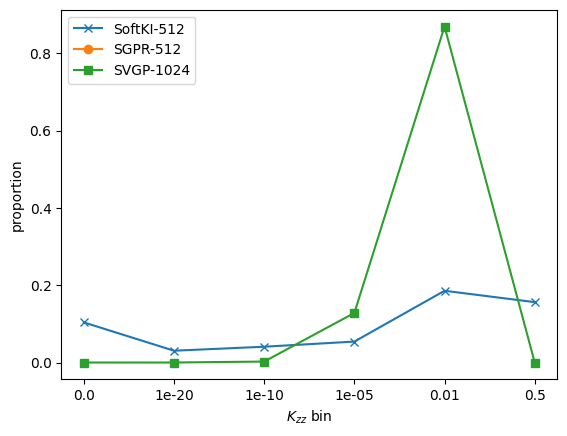

In [16]:
def plot_bins(dataset):
    bins = ["0.0", "1e-20", "1e-10", "1e-05", "0.01", "0.5"]
    plt.plot([df_bins[f"{x}-soft-gp-512-6535"][dataset]/(512**2) for x in bins], label="SoftKI-512", marker="x")
    plt.plot([df_bins[f"{x}-sv-gp-512-6535"][dataset]/(512**2) for x in bins], label="SGPR-512", marker="o")
    plt.plot([df_bins[f"{x}-svi-gp-1024-6535"][dataset]/(1024**2) for x in bins], label="SVGP-1024", marker="s")
    plt.xticks(range(len(bins)), labels=bins)
    plt.xlabel(r"$K_{zz}$ bin")
    plt.ylabel("proportion")
    plt.legend()

plot_bins("houseelectric")

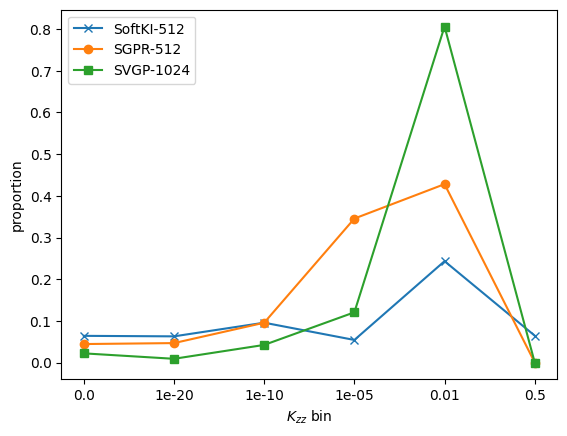

In [17]:
plot_bins("keggdirected")

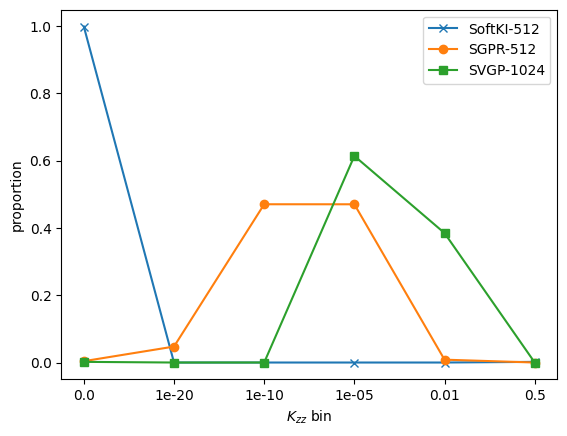

In [18]:
plot_bins("slice")